In [1]:
import matplotlib.pyplot as plt
import numpy as np

mu = 1.0
sigma = 2.0
sample = np.random.normal(mu, sigma, 10000)

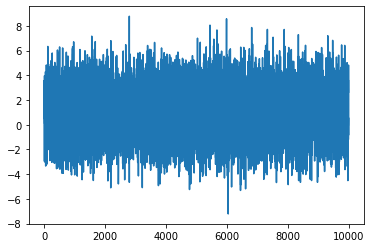

In [2]:
plt.plot(sample)

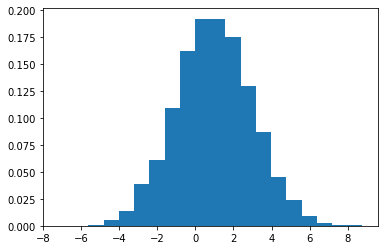

In [3]:
def plot_histogram(sample):
    count, bins, patches = plt.hist(sample, 20, density=True)

    # Plot the distribution curve
#     plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
#     plt.show()
    
plot_histogram(sample)

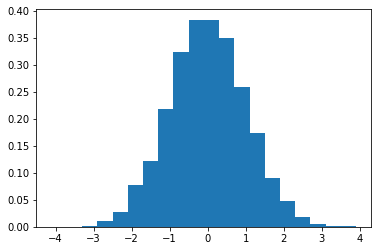

In [4]:
def standarize(sample):
    return (sample - sample.mean())/(sample.std())

sample_standarized = standarize(sample)
plot_histogram(sample_standarized)

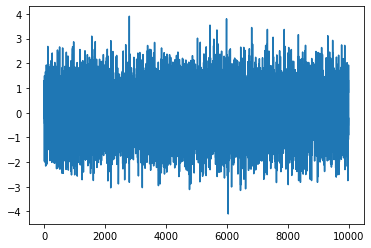

In [5]:
plt.plot(sample_standarized)

In [6]:
def plot_log_histogram(sample):
    plt.yscale('log', nonposy='clip')
    count, bins, patches = plt.hist(sample, 20, density=True)

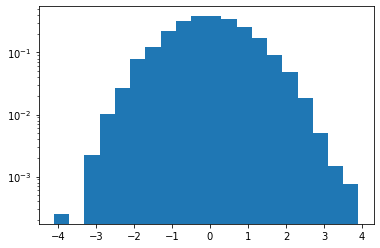

In [7]:
plot_log_histogram(sample_standarized)

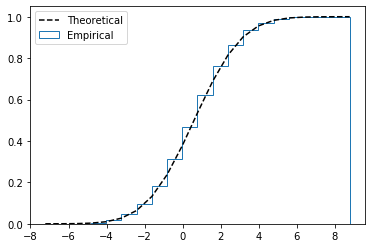

In [8]:
def plot_cumulative_distribution(sample, sigma, mu):
    count, bins, patches = plt.hist(sample, 20, density=True, cumulative=True,histtype='step', label='Empirical')
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    y = y.cumsum()
    y /= y[-1]
    plt.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')
    plt.legend(loc='upper left')

plot_cumulative_distribution(sample, sigma=sigma, mu=mu)

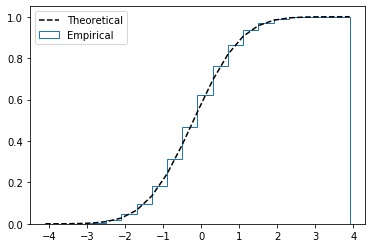

In [9]:
plot_cumulative_distribution(sample_standarized, sigma=1.0, mu=0)

In [10]:
import pandas as pd
df_gspc = pd.read_csv('gspc.csv', index_col='Date')

In [11]:
df_gspc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2020-03-31,2614.689941,2641.389893,2571.149902,2584.590088,2584.590088,6568290000
2020-04-01,2498.080078,2522.750000,2447.489990,2470.500000,2470.500000,5947900000
2020-04-02,2458.540039,2533.219971,2455.790039,2526.899902,2526.899902,6454990000


In [12]:
df_gspc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,2.317500e+04
mean,469.547606,472.290218,466.630556,469.646273,469.646273,7.433190e+08
std,695.249673,698.885847,691.282867,695.351962,695.351962,1.451354e+09
min,4.400000,4.400000,4.400000,4.400000,4.400000,0.000000e+00
25%,23.740000,23.740000,23.740000,23.740000,23.740000,1.240000e+06
50%,99.070000,99.839996,98.260002,99.070000,99.070000,1.684000e+07
75%,776.434998,786.259979,770.809998,777.839997,777.839997,4.915400e+08
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,1.145623e+10


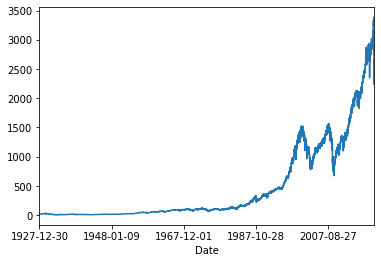

In [13]:
df_close = df_gspc['Adj Close']
df_close.plot()

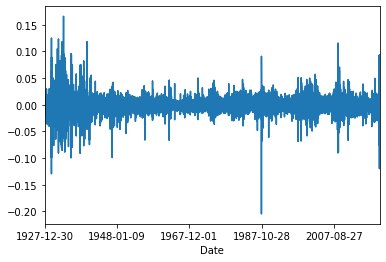

In [14]:
rets = df_close / df_close.shift(1) - 1
rets.plot(label='return')

In [25]:
df_change = pd.DataFrame(df_close).apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_change.describe()

,Adj Close
count,23174.000000
mean,0.000216
std,0.012006
min,-0.228997
25%,-0.004534
50%,0.000472
75%,0.005372
max,0.153661


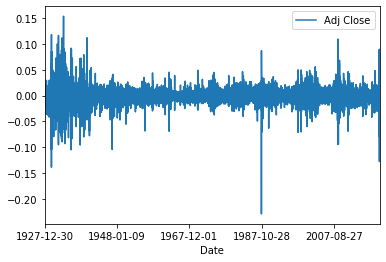

In [21]:
df_change.plot()

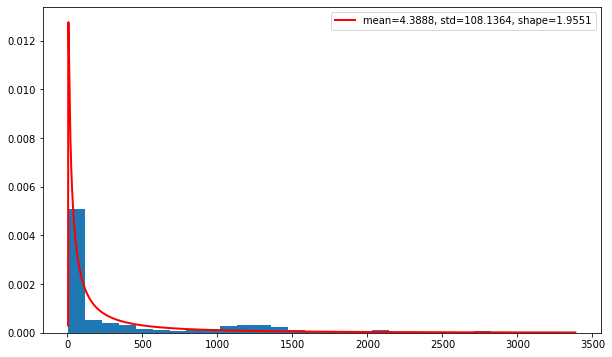

In [35]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(10, 6))


shape, loc, scale = stats.lognorm.fit(df_close) 
x = np.linspace(df_close.min(), df_close.max(), len(df_close))
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)

ax.hist(df_close, bins=30, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

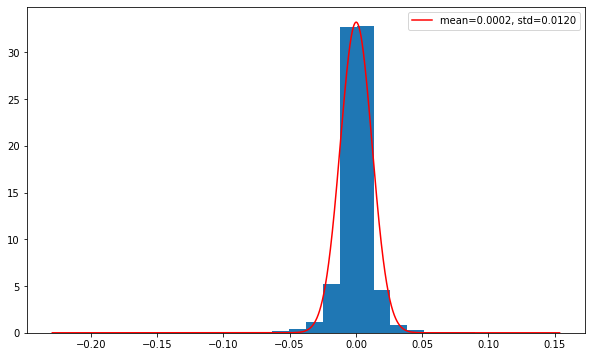

In [46]:
values = df_change['Adj Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

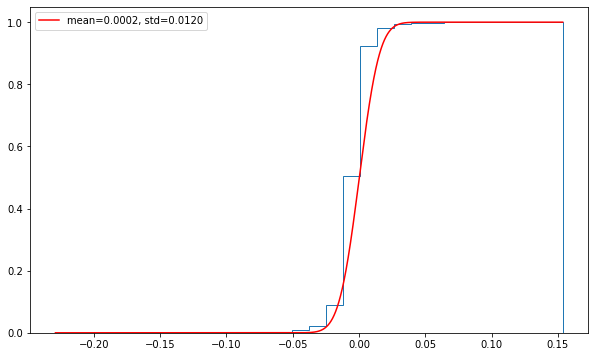

In [49]:
values = df_change['Adj Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True, cumulative=True, histtype='step')
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

# LAB 2

In [56]:
import pandas as pd
df_btcusd = pd.read_csv('Bitfinex_BTCUSD_1h.csv', index_col='Date')

In [57]:
df_btcusd

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2020-04-01 11-AM,BTCUSD,6310.00,6310.1,6293.4,6294.10,23.41,147569.08
2020-04-01 10-AM,BTCUSD,6315.70,6340.2,6308.9,6310.00,66.12,418085.75
2020-04-01 09-AM,BTCUSD,6328.10,6334.2,6290.7,6315.70,351.88,2218333.79
2020-04-01 08-AM,BTCUSD,6344.49,6345.6,6305.1,6328.10,117.64,743604.16
2020-04-01 07-AM,BTCUSD,6318.20,6355.9,6308.5,6344.49,95.89,607652.91
...,...,...,...,...,...,...,...
2017-10-09 01-PM,BTCUSD,4595.50,4621.0,4585.1,4617.20,1196.97,5515389.68
2017-10-09 12-PM,BTCUSD,4603.00,4610.0,4585.0,4595.50,570.88,2625211.20
2017-10-09 11-AM,BTCUSD,4594.90,4618.0,4594.9,4603.00,738.14,3401164.60


In [58]:
df_btcusd.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,21723.000000,21723.000000,21723.000000,21723.000000,21723.000000,2.172300e+04
mean,7768.209977,7815.329199,7718.149434,7768.298101,979.277916,8.063218e+06
std,2711.718758,2743.949160,2675.555842,2711.680826,1439.434039,1.284417e+07
min,3229.800000,3247.100000,3215.200000,3229.800000,0.000000,0.000000e+00
25%,6260.750000,6295.000000,6231.350000,6261.150000,184.335000,1.251194e+06
50%,7526.200000,7560.500000,7489.200000,7526.200000,492.900000,3.340403e+06
75%,9310.720000,9353.950000,9265.900000,9310.720000,1196.930000,9.179411e+06
max,19796.000000,19891.000000,19684.000000,19796.000000,33263.450000,2.541797e+08


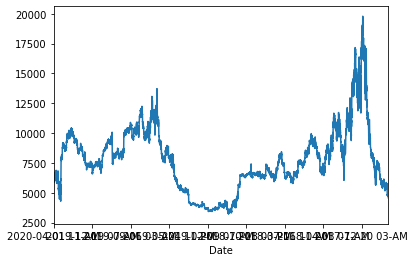

In [59]:
df_btcusd_close = df_btcusd['Close']
df_btcusd_close.plot()

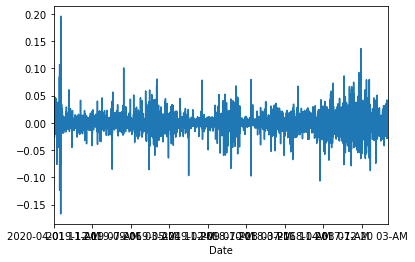

In [61]:
btdusd_rets = df_btcusd_close / df_btcusd_close.shift(1) - 1
btdusd_rets.plot(label='return')

In [64]:
df_btdusd_change = pd.DataFrame(df_btcusd_close).apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_btdusd_change.describe()

,Close
count,21722.000000
mean,-0.000015
std,0.009824
min,-0.182841
25%,-0.002930
50%,-0.000036
75%,0.002859
max,0.178806


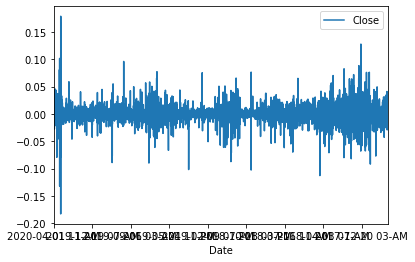

In [66]:
df_btdusd_change.plot()

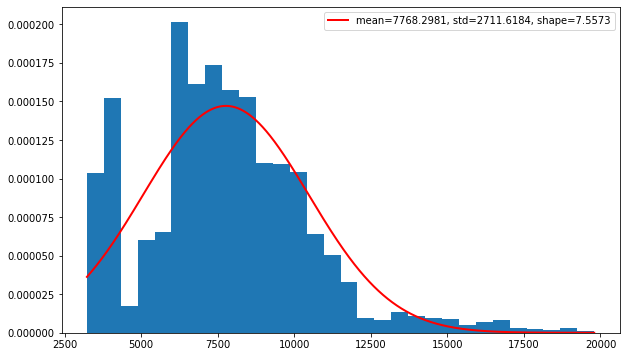

In [79]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(10, 6))


loc, scale = stats.norm.fit(df_btcusd_close) 
x = np.linspace(df_btcusd_close.min(), df_btcusd_close.max(), len(df_btcusd_close))
pdf = stats.norm.pdf(x, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)

ax.hist(df_btcusd_close, bins=30, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

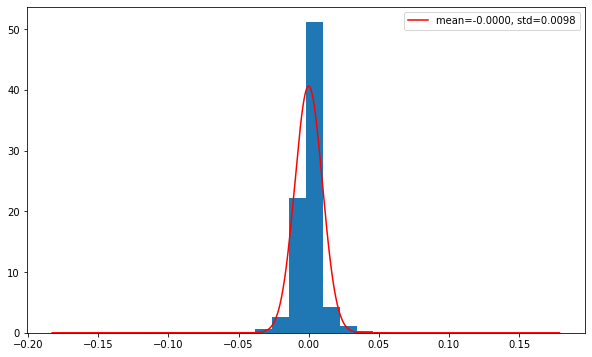

In [71]:
values = df_btdusd_change['Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

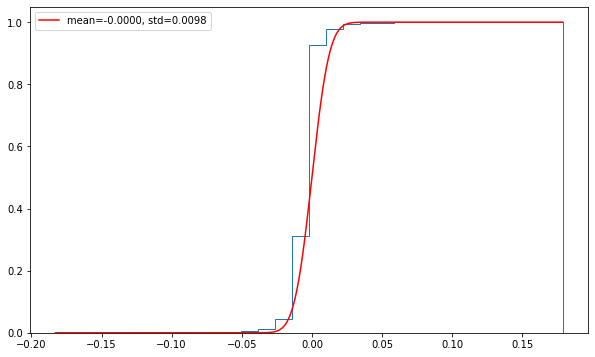

In [80]:
values = df_btdusd_change['Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True, cumulative=True, histtype='step')
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')